In [1]:
import pandas as pd
import json
import re
import pyproj
from pyproj import Proj, transform

In [2]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.


In [3]:
park_monuments_df = pd.read_csv("Resources/NYC_Parks_Monuments.csv")

In [4]:
monuments_filtered = park_monuments_df[park_monuments_df['X'].notnull()]
monuments_filtered = monuments_filtered[monuments_filtered['parkname'].notnull()]
monuments_filtered.head()

,name,fileorder,number,parkprop,borough,parkname,parknumber,commboard,council,Location,...,Name2,Name3,MaintainedByParks,Installation,Rededication,Cost,Categories,inscribed,X,Y
4,Giuseppe Garibaldi,"Garibaldi, Giuseppe",571,Y,Manhattan,Washington Square Park,M098,2.0,1.0,NaN,...,NaN,NaN,Y,NaN,NaN,NaN,Politcal Figure,NaN,985120.016293,205443.463835
24,Dr. James Marion Sims,"Sims, James Marion",1448,N,Manhattan,Central Park,NaN,7.0,8.0,"Green-Wood Cemetery, Dale and Cypress Avenues",...,NaN,NaN,N,NaN,NaN,"$10,000",Physician,NaN,986537.568248,175195.703464
25,Admiral George Dewey Memorial,"Dewey, George",1783,Y,Manhattan,Battery Park,M005,1.0,1.0,"Upper Promenade, southwest of Castle Clinton",...,NaN,NaN,Y,NaN,NaN,"$7,000","Portrait, Sculpture, Soldier, War Memorial, Sp...",NaN,979539.761705,195380.204434
53,Coast Guard Memorial,Coast Guard Memorial,277,Y,Manhattan,Battery Park,M005,1.0,1.0,Not presently accessible; under construction.,...,NaN,NaN,Y,NaN,NaN,NaN,"Sculpture, Soldier, War Memorial, World War II",NaN,980384.223599,194763.973383
54,Giovanni da Verrazzano,"Verrazano, Giovanni da",1628,Y,Manhattan,Battery Park,M005,1.0,1.0,North entrance pathway,...,NaN,NaN,Y,NaN,NaN,"$5,000 (materials only);",Explorer,NaN,979707.717406,195900.034759


In [5]:
def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="latlong", datum='NAD83')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

In [6]:
xy_to_lonlat(985120.016293, 205443.463835)

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.


(985120.016293, 205443.463835)

In [7]:
inProj  = pyproj.Proj("+init=EPSG:2263",preserve_units=True)
outProj = pyproj.Proj("+init=EPSG:4326") # WGS84 in degrees and not EPSG:3857 in meters)
# swap x,y as mkennedy says
y1,x1 =  (205443.463835, 985120.016293)
print(transform(inProj,outProj,x1,y1))

(-73.99686088849975, 40.73057144596565)


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to

In [8]:
x,y = inProj(205443.463835, 985120.016293, inverse=True)
print(x, y)

-76.90219167353177 42.834398497934835


In [9]:
p = Proj(proj='utm',zone=10,ellps='WGS84', preserve_units=False)
x,y = p(-120.108, 34.36116666, inverse=True)
x, y

(-127.4898199308272, 0.000309915815276561)

In [10]:
x = monuments_filtered["X"]
y = monuments_filtered["Y"]
long,lat = transform(inProj,outProj,x,y)

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
monuments_filtered["Longitude"] = long

In [12]:
monuments_filtered["Lattitude"] = lat

In [13]:
monuments_filtered.head()

,name,fileorder,number,parkprop,borough,parkname,parknumber,commboard,council,Location,...,MaintainedByParks,Installation,Rededication,Cost,Categories,inscribed,X,Y,Longitude,Lattitude
4,Giuseppe Garibaldi,"Garibaldi, Giuseppe",571,Y,Manhattan,Washington Square Park,M098,2.0,1.0,NaN,...,Y,NaN,NaN,NaN,Politcal Figure,NaN,985120.016293,205443.463835,-73.996861,40.730571
24,Dr. James Marion Sims,"Sims, James Marion",1448,N,Manhattan,Central Park,NaN,7.0,8.0,"Green-Wood Cemetery, Dale and Cypress Avenues",...,N,NaN,NaN,"$10,000",Physician,NaN,986537.568248,175195.703464,-73.991756,40.647548
25,Admiral George Dewey Memorial,"Dewey, George",1783,Y,Manhattan,Battery Park,M005,1.0,1.0,"Upper Promenade, southwest of Castle Clinton",...,Y,NaN,NaN,"$7,000","Portrait, Sculpture, Soldier, War Memorial, Sp...",NaN,979539.761705,195380.204434,-74.016988,40.702949
53,Coast Guard Memorial,Coast Guard Memorial,277,Y,Manhattan,Battery Park,M005,1.0,1.0,Not presently accessible; under construction.,...,Y,NaN,NaN,NaN,"Sculpture, Soldier, War Memorial, World War II",NaN,980384.223599,194763.973383,-74.013942,40.701258
54,Giovanni da Verrazzano,"Verrazano, Giovanni da",1628,Y,Manhattan,Battery Park,M005,1.0,1.0,North entrance pathway,...,Y,NaN,NaN,"$5,000 (materials only);",Explorer,NaN,979707.717406,195900.034759,-74.016383,40.704376


In [14]:
monuments_filtered.count()

name                 780
fileorder            502
number               780
parkprop             780
borough              780
parkname             780
parknumber           779
commboard            777
council              778
Location             733
extant               780
dedicated            708
cast                 429
descrip              777
dimen                636
sponsor              140
materials            761
foundry              181
fabricator            99
sculptor             384
architect            236
donor                564
maintain              16
contractor            21
Name2                 72
Name3                  0
MaintainedByParks    644
Installation           8
Rededication          16
Cost                 150
Categories           526
inscribed              0
X                    780
Y                    780
Longitude            780
Lattitude            780
dtype: int64

In [15]:
ny_all = pd.read_csv("Resources/NewYorkPlus.csv")

In [16]:
ny_all

,Unnamed: 0,Names,Geometry,Address,Lattitude,Longitude,Category,Details
0,0,O'reilly William & Co Ltd,POINT (-73.96273074561996 40.773800871637576),52 E 76th St,40.773801,-73.962731,Art_Gallery,Learn more at :http://www.nyc.com/arts__attrac...
1,1,Organization of Independent Artists - Gallery 402,POINT (-74.0093857886298 40.71646850931738),19 Hudson St.,40.716469,-74.009386,Art_Gallery,Learn more at :http://www.nonprofitgallery.com...
2,2,Owen Gallery,POINT (-73.96435178145856 40.7740008522409),19 E 75th St,40.774001,-73.964352,Art_Gallery,Learn more at :http://www.owengallery.com/abou...
3,3,P P O W Gallerie,POINT (-74.00389261044238 40.74958540084406),511 W 25th St,40.749585,-74.003893,Art_Gallery,Learn more at :http://www.ppowgallery.com/
4,4,P P O W Inc,POINT (-74.00176389614576 40.72290742771331),476 Broome St,40.722907,-74.001764,Art_Gallery,Learn more at :http://www.nyc.com/arts__attrac...
...,...,...,...,...,...,...,...,...
2703,2703,Busted,POINT(40.74622 -74.00605),NaN,40.746220,-74.006050,StreetArt,NaN
2704,2704,Hudson River Park (Pier 40),POINT(40.7292 -74.0112),"Houston Street, Pier 40",40.729200,-74.011200,Kayaking/Canoeing,NaN
2705,2705,"Building Mind, Body, and Spirit: BMS Art in th...",POINT(40.671748 -73.907709),NaN,40.671748,-73.907709,StreetArt,NaN
2706,2706,Hudson River Park (Pier 96),POINT(40.7711 -73.9956),"56th Street, Pier 96",40.771100,-73.995600,Kayaking/Canoeing,NaN


In [17]:
ny_all.loc[ny_all.Longitude >= 0] = (ny_all.loc[ny_all.Longitude >= 0]*-1)

In [18]:
ny_all.loc[ny_all.Longitude >= 0]

,Unnamed: 0,Names,Geometry,Address,Lattitude,Longitude,Category,Details


array([[<AxesSubplot:title={'center':'Longitude'}>]], dtype=object)

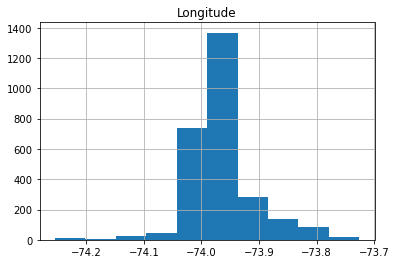

In [19]:
ny_all.hist(column="Longitude")

array([[<AxesSubplot:title={'center':'Lattitude'}>]], dtype=object)

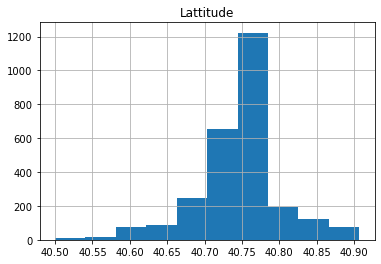

In [25]:
ny_all.hist(column="Lattitude")

In [21]:
ny_all.loc[ny_all.Lattitude <= 0]

,Unnamed: 0,Names,Geometry,Address,Lattitude,Longitude,Category,Details
2410,-2410,,,NaN,-40.791907,-73.946011,,
2625,2625,To Each Their Own,POINT(-74.004524 -74.004524),NaN,-74.004524,-74.004524,StreetArt,Made by Various Artists


In [22]:
ny_all.drop(ny_all.loc[ny_all.Lattitude <= -70].index, inplace=True)

In [23]:
ny_all.loc[ny_all.Lattitude <= 0] = (ny_all.loc[ny_all.Lattitude >= 0]*-1)

In [24]:
ny_all.loc[ny_all.Lattitude <= 0]

,Unnamed: 0,Names,Geometry,Address,Lattitude,Longitude,Category,Details
